In [5]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-05-29 05:56:49--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  28.6MB/s    in 0.8s    

2025-05-29 05:56:50 (28.6 MB/s) - ‘online+retail.zip’ saved [23715478]



In [3]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [7]:
df1=pd.read_excel('Online Retail.xlsx',dtype={'Invoice':'string','StockCode':'string','Description':'string','Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [8]:
df1.shape


(541909, 8)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), string(3)
memory usage: 33.1+ MB


#### Data Cleaning:Handle Missing Malues

In [10]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [11]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [13]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [16]:
most_freq=df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [18]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [19]:
most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [20]:
most_freq.columns=["StockCode","Freq_Description","count"]
df2=df1.merge(most_freq,on="StockCode",how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [21]:
df2['Description']=df2['Freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [22]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171188
Country,0
Freq_Description,112
count,112


In [23]:
df2.dropna(subset=["Description"],inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171076
Country,0
Freq_Description,0
count,0


In [24]:
df2.drop(columns=["Freq_Description","count"],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,710919.000000,710919,710919.000000,539843.000000
mean,9.718405,2011-07-05 11:53:55.375253248,4.410160,15290.162562
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:17:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:31:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.114446,NaN,84.525607,1709.392583


In [27]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391449,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
391450,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [28]:
df3=df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,693945.000000,693945,693945.000000,527365.000000
mean,10.873889,2011-07-05 15:59:13.143203328,3.874301,15296.797165
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 15:20:00,1.250000,13969.000000
50%,4.000000,2011-07-21 10:44:00,2.100000,15159.000000
75%,12.000000,2011-10-19 11:49:00,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.669424,NaN,31.507544,1708.785281


In [30]:
df3.Quantity.quantile(0.9999)

np.float64(1530.1399999973364)

In [31]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6336,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
6472,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
33829,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
42702,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
68298,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
672274,579498,23084,add stock to allocate online orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672275,579498,23084,allocate stock for dotcom orders ta,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672276,579498,23084,for online retail orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672277,579498,23084,temp adjustment,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


### Feature Engineering:Create New Columns

In [32]:
df4=df3.copy()
df4['TotalSales']=df4['Quantity']*df4['UnitPrice']
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693945 entries, 0 to 711030
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    693945 non-null  object        
 1   StockCode    693945 non-null  string        
 2   Description  693945 non-null  string        
 3   Quantity     693945 non-null  int64         
 4   InvoiceDate  693945 non-null  datetime64[ns]
 5   UnitPrice    693945 non-null  float64       
 6   CustomerID   527365 non-null  float64       
 7   Country      693945 non-null  string        
 8   TotalSales   693945 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1), string(3)
memory usage: 52.9+ MB


In [34]:
df4['Month']=df4['InvoiceDate'].dt.month

df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12


### Visualization and EDA

##### 1.Plot Monthly Sales

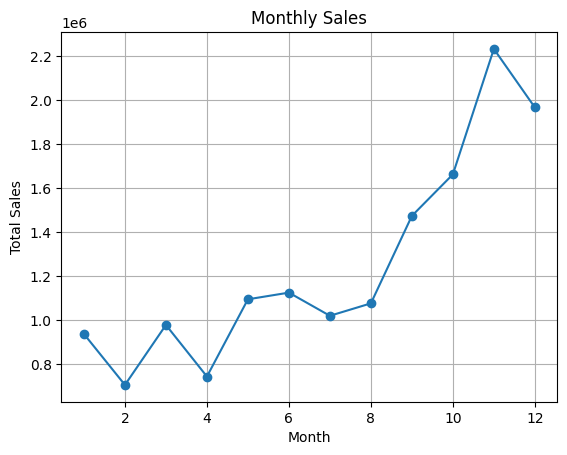

In [41]:
monthly_sales=df4.groupby("Month")["TotalSales"].sum()
monthly_sales.plot(kind="line",title="Monthly Sales",marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

**Insights**

Total sales started rising up in August having a peek in November.This is likely due to the holiday season at the end of the year

##### 2.Top 5 Countries By Sales

In [42]:
# prompt: Plot Horizontal bar chart for top 5 countries by total sales

country_sales = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
country_sales

,TotalSales
Country,
United Kingdom,1.269449e+07
Netherlands,4.316229e+05
EIRE,3.937788e+05
Germany,3.051400e+05
France,3.028098e+05


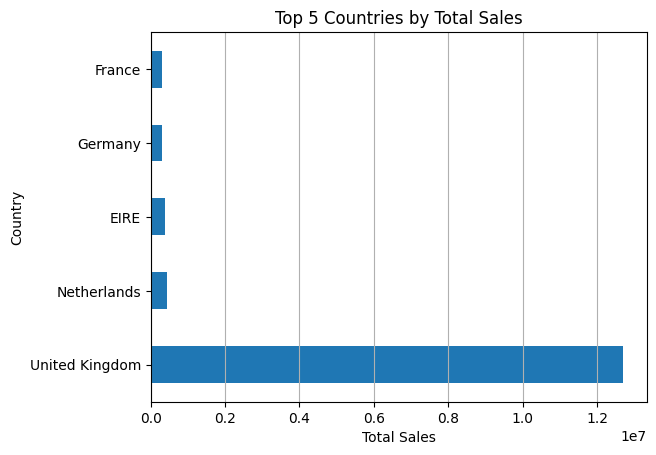

In [44]:
country_sales.plot(kind='barh', title='Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(axis="x")
plt.show()

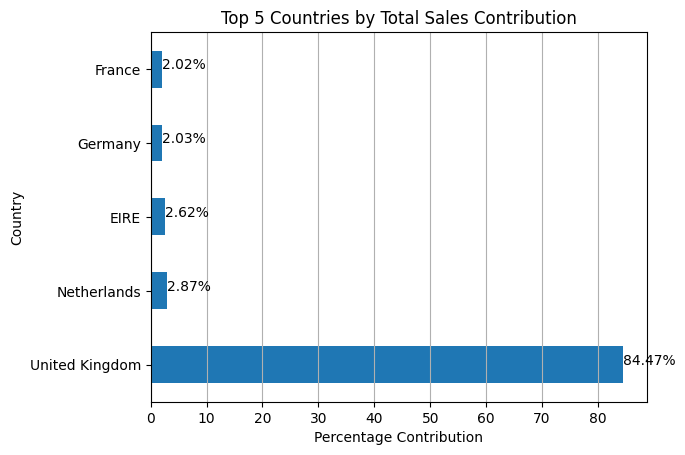

In [45]:
# prompt: Plot same chart as above but this time use percentage contribution. Show % on the bar

# Calculate the total sales across all countries
total_sales_all_countries = df4['TotalSales'].sum()

# Calculate the percentage contribution of each country
country_sales_percentage = (country_sales / total_sales_all_countries) * 100

# Plot the horizontal bar chart
ax = country_sales_percentage.plot(kind='barh', title='Top 5 Countries by Total Sales Contribution')
plt.xlabel('Percentage Contribution')
plt.ylabel('Country')
plt.grid(axis="x")

# Add percentage labels to the bars
for index, value in enumerate(country_sales_percentage):
    plt.text(value, index, f'{value:.2f}%')

plt.show()


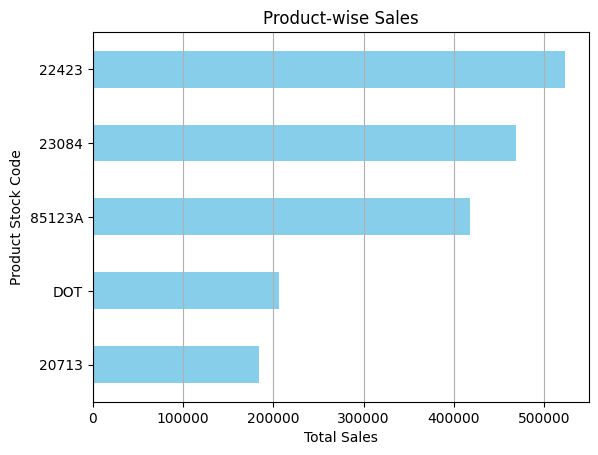

In [46]:
product_wise_sales=df4.groupby('StockCode')['TotalSales'].sum()
top_5_products=product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh',color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [47]:
df4[df4.StockCode=="DOT"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
2364,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3927,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
7143,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
7268,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
7450,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
704672,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
705202,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
707914,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
709774,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [48]:
for stock_code in top_5_products.index:
  description=df4[df4.StockCode==stock_code].Description.mode()[0]
  print(f"Stock Code: {stock_code}, Description: {description}")

Stock Code: 22423, Description: REGENCY CAKESTAND 3 TIER
Stock Code: 23084, Description: Amazon
Stock Code: 85123A, Description: ?
Stock Code: DOT, Description: DOTCOM POSTAGE
Stock Code: 20713, Description: Found


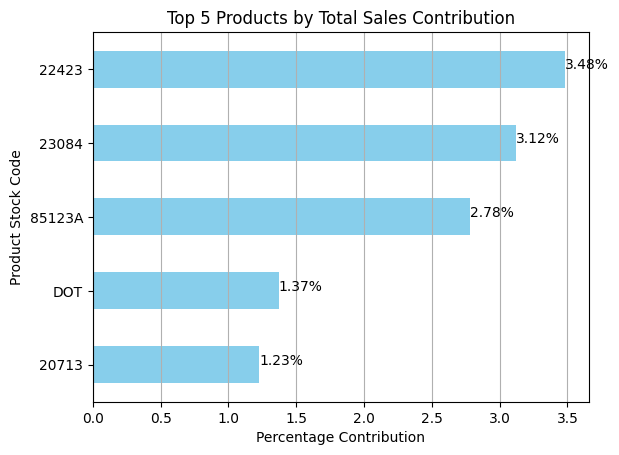

In [49]:
# prompt: Plot same chart as above for product sales but use percentage this time.Show % on the bar

# Calculate the total sales across all products
total_sales_all_products = df4['TotalSales'].sum()

# Calculate the percentage contribution of each top product
top_5_products_percentage = (top_5_products / total_sales_all_products) * 100

# Plot the horizontal bar chart
ax = top_5_products_percentage.plot(kind='barh', color='skyblue')
plt.title('Top 5 Products by Total Sales Contribution')
plt.xlabel('Percentage Contribution')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# Add percentage labels to the bars
for index, value in enumerate(top_5_products_percentage):
    plt.text(value, index, f'{value:.2f}%')

plt.show()

#### 4.RFM Analysis

In [51]:
current_dt=df4["InvoiceDate"].max()+pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [53]:
rfm=df4.groupby("CustomerID").agg({
    "InvoiceDate":lambda x:(current_dt-x.max()).days,
    "InvoiceNo":"count", # Changed 'Invoice' to 'InvoiceNo'
    "TotalSales":"sum"
})
rfm.columns=['Recency','Frequency','Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,227,5971.21
12348.0,75,34,1930.44
12349.0,19,92,2165.86
12350.0,310,19,364.40


In [56]:
df4[df4.CustomerID==12347]["TotalSales"].sum()

np.float64(5971.210000000001)

In [57]:
rfm['R_segment']=pd.qcut(rfm['Recency'],q=4,labels=[4,3,2,1])
rfm['F_segment']=pd.qcut(rfm['Frequency'],q=4,labels=[1,2,3,4])
rfm['M_segment']=pd.qcut(rfm['Monetary'],q=4,labels=[1,2,3,4])
rfm['RFM_Score']=rfm[['R_segment','F_segment','M_segment']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,227,5971.21,4,4,4,12
12348.0,75,34,1930.44,2,2,3,7
12349.0,19,92,2165.86,3,3,3,9
12350.0,310,19,364.40,1,1,1,3


In [59]:
#Customers with highest RFM scores
rfm.sort_values('RFM_Score',ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_Score
CustomerID,,,,,,,
12362.0,3,330,6374.86,4,4,4,12
15194.0,3,406,10150.04,4,4,4,12
15271.0,7,344,3385.22,4,4,4,12
15218.0,11,253,8991.13,4,4,4,12
15298.0,2,256,7658.92,4,4,4,12
...,...,...,...,...,...,...,...
12350.0,310,19,364.40,1,1,1,3
12977.0,156,9,39.24,1,1,1,3
17639.0,276,8,128.40,1,1,1,3


#### 5.Customer Churn Analysis

In [60]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12


In [61]:
#create a basket matrix for association rule mining
customer_last_purchase=df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [62]:
customer_last_purchase=(current_dt-customer_last_purchase).dt.days
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [63]:
#define churn threshold ( e.g 90 days without purchase)
churn_threshold=90
churned_customers=customer_last_purchase[customer_last_purchase>churn_threshold]
churned_customers.head()

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of churned customers: 1449


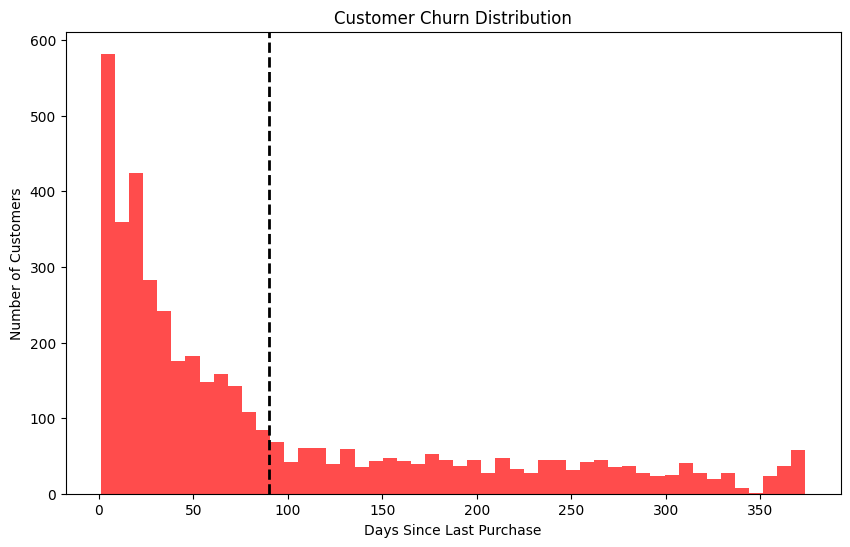

In [65]:
print("Number of churned customers:",len(churned_customers))
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase,bins=50,color='red',alpha=0.7)
plt.axvline(churn_threshold,color='black',linestyle='dashed',linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()